In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [5]:
df.isnull().mean()*100

Survived     0.000000
Age         20.574163
Fare         0.239234
dtype: float64

In [6]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()

mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()

In [7]:
df['Age_median'] = df['Age'].fillna(median_age)
df['Age_mean'] = df['Age'].fillna(mean_age)

df['Fare_median'] = df['Fare'].fillna(median_fare)
df['Fare_mean'] = df['Fare'].fillna(mean_fare)

In [9]:
df.head()

,Survived,Age,Fare,Age_median,Age_mean,Fare_median,Fare_mean
0,0,34.5,7.8292,34.5,34.5,7.8292,7.8292
1,1,47.0,7.0000,47.0,47.0,7.0000,7.0000
2,0,62.0,9.6875,62.0,62.0,9.6875,9.6875
3,0,27.0,8.6625,27.0,27.0,8.6625,8.6625
4,1,22.0,12.2875,22.0,22.0,12.2875,12.2875


In [8]:
print('Original Age variable variance: ', df['Age'].var())
print('Age Variance after median imputation: ', df['Age_median'].var())
print('Age Variance after mean imputation: ', df['Age_mean'].var())

print('Original Fare variable variance: ', df['Fare'].var())
print('Fare Variance after median imputation: ', df['Fare_median'].var())
print('Fare Variance after mean imputation: ', df['Fare_mean'].var())

Original Age variable variance:  201.10669538455943
Age Variance after median imputation:  161.38576830860669
Age Variance after mean imputation:  159.63145365057355
Original Fare variable variance:  3125.657074319579
Fare Variance after median imputation:  3119.233970938552
Fare Variance after mean imputation:  3118.1614938056227


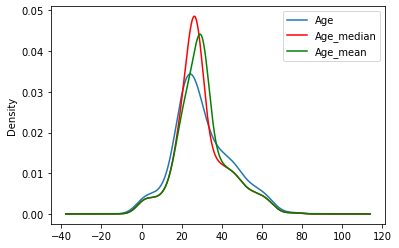

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
df['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
df['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

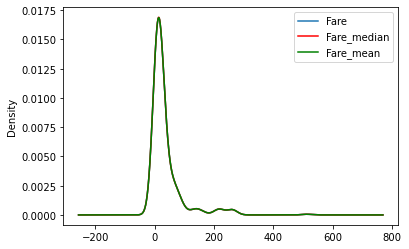

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
df['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
df['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [13]:
df.cov()

,Survived,Age,Fare,Age_median,Age_mean,Fare_median,Fare_mean
Survived,0.231960,-0.000088,5.159417,0.049158,-0.000069,5.165508,5.147044
Age,-0.000088,201.106695,291.838610,201.106695,201.106695,288.534356,290.467905
Fare,5.159417,291.838610,3125.657074,245.061177,231.117492,3125.657074,3125.657074
Age_median,0.049158,201.106695,245.061177,161.385768,159.631454,242.904531,244.473501
Age_mean,-0.000069,201.106695,231.117492,159.631454,159.631454,229.028470,230.563253
Fare_median,5.165508,288.534356,3125.657074,242.904531,229.028470,3119.233971,3118.161494
Fare_mean,5.147044,290.467905,3125.657074,244.473501,230.563253,3118.161494,3118.161494


In [14]:
df.corr()

,Survived,Age,Fare,Age_median,Age_mean,Fare_median,Fare_mean
Survived,1.000000,-0.000013,0.191514,0.008035,-0.000011,0.192036,0.191382
Age,-0.000013,1.000000,0.337932,1.000000,1.000000,0.332709,0.335029
Fare,0.191514,0.337932,1.000000,0.347105,0.329071,1.000000,1.000000
Age_median,0.008035,1.000000,0.347105,1.000000,0.994550,0.342357,0.344627
Age_mean,-0.000011,1.000000,0.329071,0.994550,1.000000,0.324568,0.326800
Fare_median,0.192036,0.332709,1.000000,0.342357,0.324568,1.000000,0.999828
Fare_mean,0.191382,0.335029,1.000000,0.344627,0.326800,0.999828,1.000000


<AxesSubplot:>

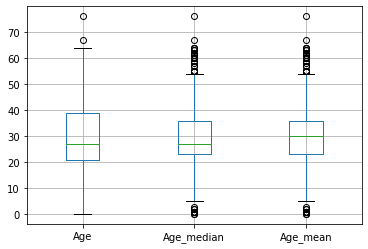

In [15]:
df[['Age', 'Age_median', 'Age_mean']].boxplot()

<AxesSubplot:>

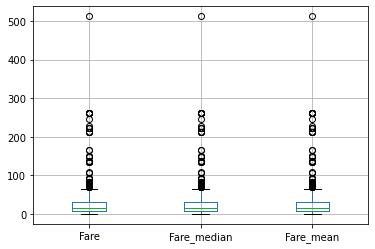

In [16]:
df[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

# using scikit learn

In [17]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [18]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [19]:
trf.fit(df)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [20]:
trf.named_transformers_

{'imputer1': SimpleImputer(strategy='median'),
 'imputer2': SimpleImputer(),
 'remainder': 'passthrough'}

In [21]:
trf.named_transformers_['imputer1'].statistics_

array([27.])

In [22]:
trf.named_transformers_['imputer2'].statistics_

array([35.62718849])